In [28]:
par(family  = "Arial")
#install.packages("showtext")
library(showtext)
showtext_auto()
options(repr.plot.width=5, repr.plot.height=5)

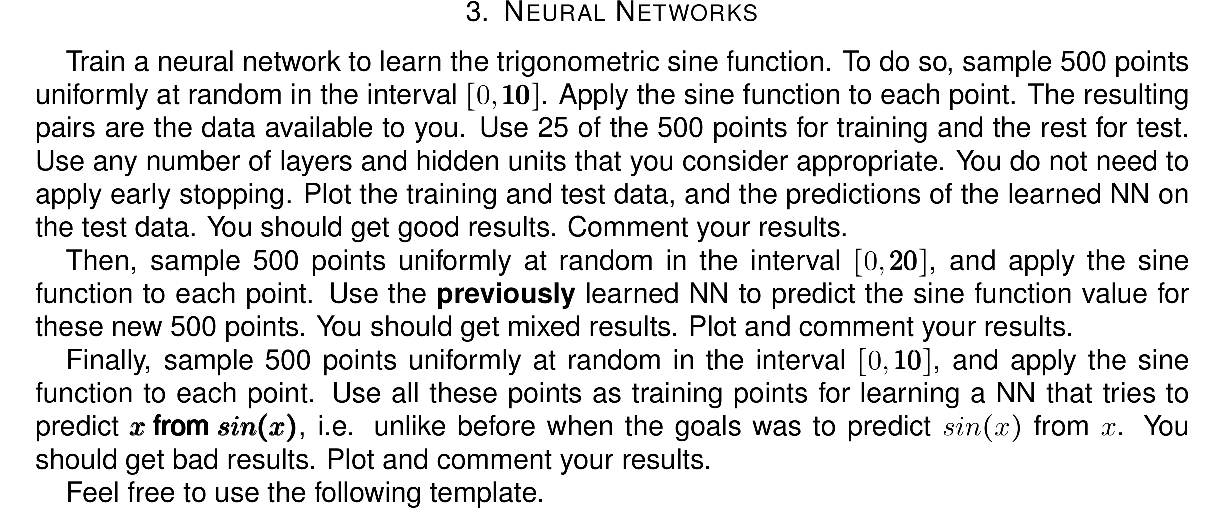

### *a)Plot the training and test data, and the predictions of the learned NN on the test data. You should get good results. Comment your results.* 

First, we initialized the weights randomly to almost-zero values ,in order to avoid updating them in the same way.

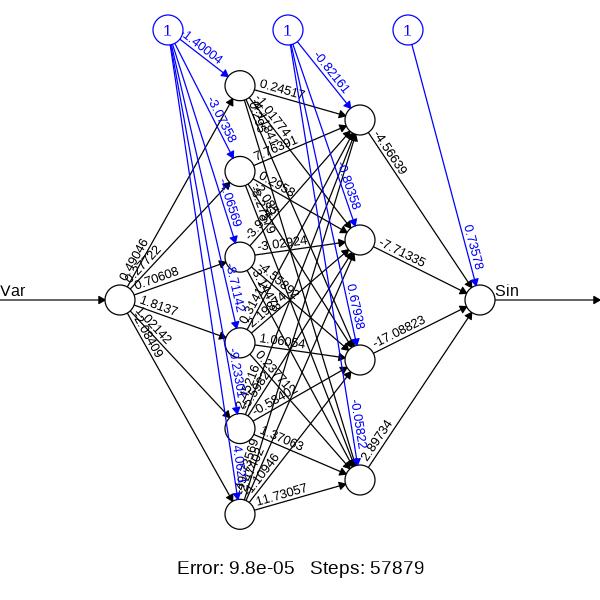

In [29]:
library(neuralnet)
set.seed(1234567890)
Var <- runif(500, 0, 10)
mydata <- data.frame(Var, Sin=sin(Var))
tr <- mydata[1:25,] # Training
te <- mydata[26:500,] # Test
# Random initialization of the weights in the interval [-1, 1]
set.seed(1234567890)
winit <- runif(301, -1, 1)
set.seed(1234567890)
hidUnit <- c(6,4)
# Train a Neural Network
set.seed(1234567890)
nn <- neuralnet(Sin ~Var,data = tr,hidden=hidUnit,
                startweights = winit,learningrate = 0.001,
                threshold = 1e-4)


plot(nn,rep="best") #important to add the 'best' argument



2 hidden layer has been used. 6 hidden unit in the first latent layer and 4 hidden unit in the second latent unit. The Error of the model is very small , $9.8\mathrm{e}{-5}$.

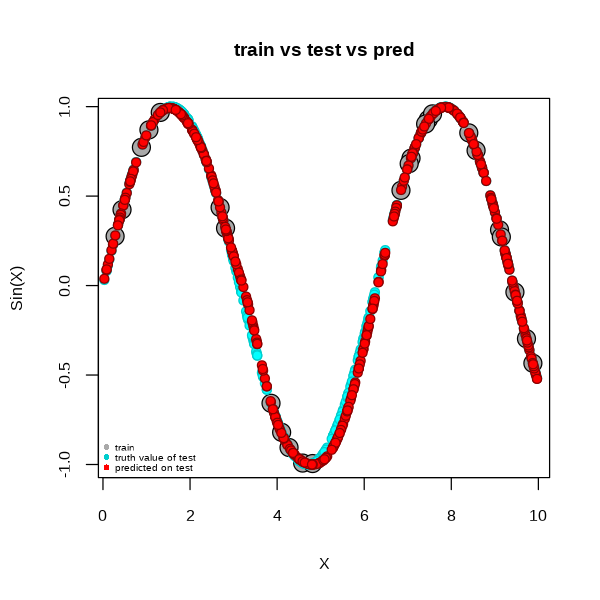

In [31]:
# Plot of the training data (black), test data (blue), and predictions (red)
plot(tr, cex=2,main='train vs test vs pred',pch = 21,bg="darkgrey",
     xlab="X",ylab="Sin(X)")
points(te, col = "cyan3", cex=1,pch = 21,bg="cyan")
points(te[,1],predict(nn,te), col="darkred",bg="red", cex=1,pch=21)

legend("bottomleft", legend=c("train","truth value of test","predicted on test"),
       pch=c(16,16,16),col = c("darkgrey","cyan3","red"),
       cex = 0.65,bty = "n")



As seen in the graph, our model performs well, and predicts the test data with only a slight error. 


### *b) Then, sample 500 points uniformly at random in the interval $\left[ {0,20} \right]$, and apply the sine function to each point. Use the previously learned NN to predict the sine function value for these new 500 points. You should get mixed results. Plot and comment your results.*


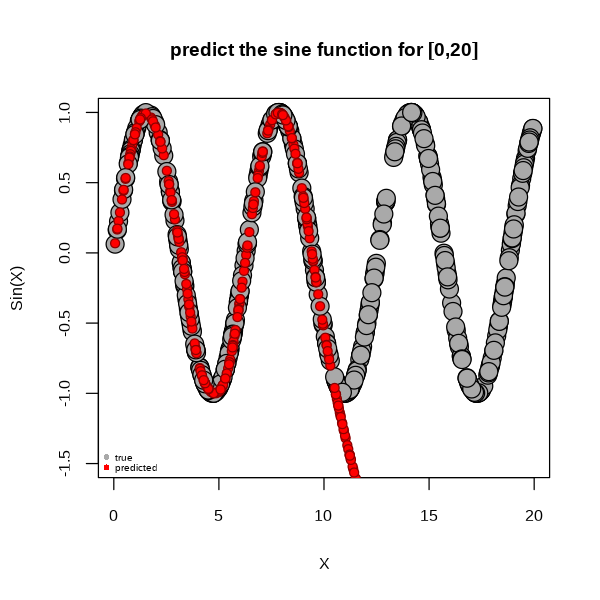

In [33]:
set.seed(1234567890)
Var2 <- runif(500, 0, 20)
mydata2 <- data.frame(Var=Var2, Sin=sin(Var2))
plot(mydata2, cex=2,main='predict the sine function for [0,20]',pch = 21,bg="darkgrey",
     xlab="X",ylab="Sin(X)",ylim=c(-1.5,1))
points(mydata2[,1],predict(nn,mydata2), col="darkred", cex=1,pch=21,bg="red")

legend("bottomleft", legend=c("true","predicted"), pch=c(16,16),col = 
         c("darkgrey","red"),cex = 0.65,bty = "n")

From the graph, we can see that the our neural network has only been successful in predicting values of $x$ between $\left[ {0,10} \right]$ and  clearly has not learned the general shape of $\sin x$ for $x$ between $\left[ {10,20} \right]$. This shows the network will not generalize to examples outside of the training set. Early stopping technique , could help the network avoid overfitting on the training data, which will result in a better generalization.


### *c) Finally, sample 500 points uniformly at random in the interval $\left[ {0,10} \right]$, and apply the sine function to each point. Use all these points as training points for learning a NN that tries to predict $x$ from $\sin x$, i.e. unlike before when the goals was to predict $\sin x$ from x. You should get bad results. Plot and comment your results*

The network architecture :

In [35]:
set.seed(1234567890)
Var3 <- runif(500, 0, 20)
mydata3 <- data.frame(Sin=sin(Var3),Var=Var3)
set.seed(1234567890)
winit <- runif(5500, -1, 1)
#hidUnit <- c(9,1)
set.seed(1234567890)
nn3 <-neuralnet(formula = Var~Sin,data = mydata3,
                hidden =c(4,2,1),startweights =winit,
              learningrate = 0.01,act.fct = "tanh")



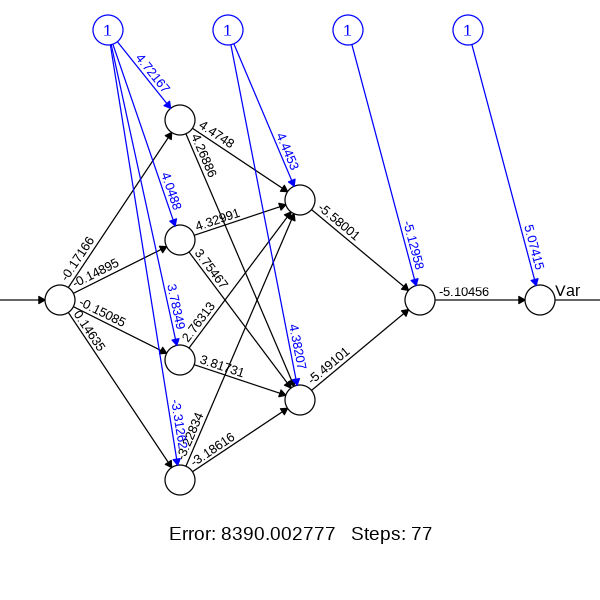

In [37]:
plot(nn3,rep='best')

In this task, the data to be learned is sequential and a feedforward neural network does not work for sequential or time-dependent data. Furthermore, in this example, we are trying to predict infinitely many x values from one sin(x) value. As a result, what we are trying to predict is not a function. A function maps every x value to exactly one y value. In this case, there are theoretically infinitely many values that x can take on for every sin(x) we feed into the function. The domain of arcsin(x) is only from -1 to 1 and the range is from $-\pi/2$ to $\pi/2$ radians (not from 0 to 20). All these cause to poor prediction. One solution might be to constrain $x$ values to  $-\pi/2$ to $\pi/2$


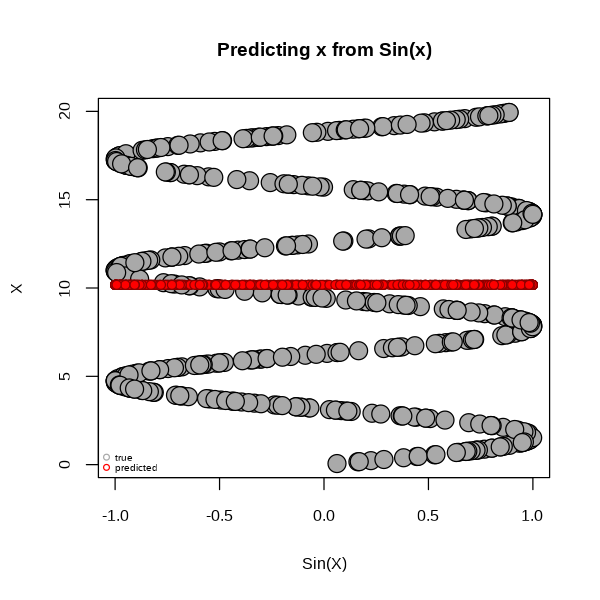

In [38]:
plot(mydata3, cex=2,main='Predicting x from Sin(x)',
     pch = 21,bg="darkgrey",
     ylab="X",xlab="Sin(X)")
points(mydata3[,1],predict(nn3,mydata3), col="darkred", 
       cex=1,pch=21,bg="red")

legend("bottomleft", legend=c("true","predicted"), pch=c(21,21),
       col = c("darkgrey","red"),cex = 0.65,bty = "n")